### Contacts: leonardo.cianfanelli@polito.it

# Setting Up Your Environment

The first part of this notebook contains some guidelines to prepare programming environments for the upcoming labs of the "Network Dynamics and Learning" course. 
During our labs we will mostly work in Jupyter Notebook. 

(We are using Python 3)

### Step 1: Install Jupyter Notebook

I suggest you to install free [Anaconda](https://docs.anaconda.com/anaconda/install/) Python distribution which already includes all necessary Python packages and modules - NumPy, SciPy, Matplotlib and **NetworkX**. Simply download appropriate installer for your OS and follow the proposed steps.

<!-- -*- coding: utf-8 -*- -->
# Introduction to NetworkX
*Credits: This tutorial was created by the NetworkX Developers and modified by Leonardo Cianfanelli.*

This guide can help you start working with NetworkX.

## Graph Types

NetworkX provides data structures and methods for storing graphs. The choice of graph class depends on the structure of the graph you want to represent.


### Graph—Undirected graphs
Base class for undirected graphs.
A Graph stores nodes and edges with optional data, or attributes.
Graphs hold undirected edges. Self loops are allowed but multiple (parallel) edges are not.
Edges are represented as links between nodes with optional key/value attributes.

#### Creating a Graph

Create an empty graph with no nodes and no edges.

In [17]:
import networkx as nx
G = nx.Graph()

By definition, a `Graph` is a collection of nodes (vertices) along with
identified pairs of nodes (called edges, links, etc).  In NetworkX, nodes can
be objects with many different types, e.g., a number, a text string, an image, another
Graph, etc.

## Nodes

The graph `G` can be grown in several ways. You can add one node at a time,

In [18]:
G.add_node(1)
print(G.nodes)

[1]


or you can add the nodes from any container (a list, dictionary, set or the nodes from another graph).

In [19]:
n_list = [11,12]
n_set = set((21,22))

G.add_nodes_from(n_list)
G.add_nodes_from(n_set)
G.add_nodes_from(range(100, 110))

print(G.nodes)

[1, 11, 12, 21, 22, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]


In [20]:
H = nx.path_graph(10)
print("Nodes of H:", H.nodes)

G.add_nodes_from(H)
print("Nodes of G:", G.nodes)

Nodes of H: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Nodes of G: [1, 11, 12, 21, 22, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 0, 2, 3, 4, 5, 6, 7, 8, 9]


# What to use as nodes and edges
Nodes can be even other graphs.

In [21]:
G.add_node(H)
print(G.nodes)

[1, 11, 12, 21, 22, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 0, 2, 3, 4, 5, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x7f7279c17d10>]


The graph `G` now contains `H` as a node. This flexibility is very powerful as
it allows graphs of graphs, graphs of files, and much more.

This power quite useful, but its abuse can lead to surprising behavior unless one is familiar with Python. If in doubt, consider using convert_node_labels_to_integers() to obtain a more traditional graph with integer labels.

In [22]:
G2=nx.convert_node_labels_to_integers(G)

print(G2.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


## Edges

`G` can also be grown by adding one edge at a time,

In [23]:
G.add_edge(1, 2)
print(G.edges)

[(1, 2)]


by adding a list of edges,

In [24]:
G.add_edges_from([(1, 2), (1, 3)])
print(G.edges)

[(1, 2), (1, 3)]


or by adding any ebunch of edges.  An *ebunch* is any iterable
container of edge-tuples.
For example, an instance of ebunch containing all the edges of the graph H is obtained with `H.edges`:

In [25]:
G.add_edges_from(H.edges)
print(G.edges)

[(1, 2), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


An edge-tuple can be a 2-tuple of nodes or a 3-tuple
with 2 nodes followed by an edge attribute dictionary, e.g.,
`(2, 3, {'weight': 3.1415})`.

In [26]:
edges_weighted = [(1 ,5, {'attribute': 2}), (1, 6)];
G.add_edges_from(edges_weighted)
print(G.edges)

[(1, 2), (1, 3), (1, 0), (1, 5), (1, 6), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


If some edges connect nodes not yet in the graph, the nodes are added automatically. There are no errors when adding nodes or edges that already exist.


For example, after removing all nodes and edges, we add an edge without adding nodes, but the nodes are still in the graph.

In [27]:
G.clear()
G.add_edges_from([(1, 2), (1, 3)])
print(G.nodes)

[1, 2, 3]


We now add new nodes/edges and NetworkX quietly ignores any that are already present.

In [28]:
G.add_node(1)
G.add_edge(1, 2)

At this stage the graph `G` consists of 3 nodes and 2 edges, as can be seen by:

In [29]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 3
Number of edges: 2


# Examining elements of a graph


We can examine the nodes and edges. Four basic graph properties facilitate
reporting: `G.nodes`, `G.edges`, `G.adj` and `G.degree`.  These
are views of the nodes, edges, neighbors (adjacencies), and degrees
of nodes in a graph. They offer a continually updated read-only view into
the graph structure.

They are also dict-like in that you can look up node
and edge data attributes via the views and iterate with data attributes
using methods `.items()`, `.data('attribute')`.


If you want a specific container type instead of a view, you can specify one.
Here we use lists, though sets, dicts, tuples and other containers may be
better in other contexts.

In [30]:
print("List of nodes:", list(G.nodes))
print("List of edges:", list(G.edges))
print("List of neighbors of node 1:", list(G.adj[1])) # or list(G.neighbors(1))
print("Degree of node 1:", G.degree[1])  # the number of edges incident to 1

List of nodes: [1, 2, 3]
List of edges: [(1, 2), (1, 3)]
List of neighbors of node 1: [2, 3]
Degree of node 1: 2


# Removing elements from a graph

One can remove nodes and edges from the graph in a similar fashion to adding.
Use methods
`Graph.remove_node()`,
`Graph.remove_nodes_from()`,
`Graph.remove_edge()`
and
`Graph.remove_edges_from()`, e.g.

In [31]:
G.remove_node(2)
print("Nodes of G:", G.nodes)

Nodes of G: [1, 3]


If you remove elements that are not in the graph from a container, NetworkX does not give an error.

In [32]:
G.remove_nodes_from([4,5])

If you instead remove single elements that are not in the graph, NetworkX does give an error.


# Accessing edges and neighbors


You can get/set attributes of an edge using subscript notation
if the edge already exists.

In [33]:
G = nx.Graph()
G.add_edges_from([(1,3),(1,2)])
G[1][3]['color'] = "blue"
G.edges[(1, 2)]['color'] = "red"
print("Edges with attributes:", dict(G.edges))

Edges with attributes: {(1, 3): {'color': 'blue'}, (1, 2): {'color': 'red'}}


You can add weighted edges.

Fast examination of all (node, adjacency) pairs is achieved using
`G.adjacency()`, or `G.adj.items()`.
Note that for undirected graphs, adjacency iteration sees each edge twice.

In [34]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

FG.adj.items()

ItemsView(AdjacencyView({1: {2: {'weight': 0.125}, 3: {'weight': 0.75}}, 2: {1: {'weight': 0.125}, 4: {'weight': 1.2}}, 3: {1: {'weight': 0.75}, 4: {'weight': 0.375}}, 4: {2: {'weight': 1.2}, 3: {'weight': 0.375}}}))

Here is a simple code that prints the edges (repeated twice, because the graph is undirected) with weight less than 0.5 by using `G.adj.items()`.

In [35]:
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print('(%d, %d, %.3f)' % (n, nbr, wt))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


Convenient access to all edges is achieved with the edges property.

In [36]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5: 
        print('(%d, %d, %.3f)' % (u, v, wt))

(1, 2, 0.125)
(3, 4, 0.375)


# Directed graphs

The `DiGraph` class provides additional properties specific to
directed edges, e.g.,
`DiGraph.out_edges()`, `DiGraph.in_degree()`,
`DiGraph.predecessors()`, `DiGraph.successors()` etc.
To allow algorithms to work with both classes easily, the directed versions of
`neighbors()` is equivalent to `successors()` while `degree` reports
the sum of `in_degree` and `out_degree` even though that may feel
inconsistent at times.

In [37]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
# argument weight specifies which edge attribute to be used as weight in computing the degree (edges may have other attributes)
print("Out degree of node 1:",DG.out_degree(1, weight='weight')) 
print("Sum of in-degree and out-degree of node 1:", DG.degree(1, weight='weight'))
print("Successors of node 1:", list(DG.successors(1)))
print("All neighbors of node 1:", list(DG.neighbors(1)))

Out degree of node 1: 0.5
Sum of in-degree and out-degree of node 1: 1.25
Successors of node 1: [2]
All neighbors of node 1: [2]


Some algorithms work only for directed graphs and others are not well
defined for directed graphs. If you want to treat
a directed graph as undirected for some measurement you should probably
convert it using `Graph.to_undirected()` or with

In [38]:
H = nx.Graph(DG)  # convert G to undirected graph

# Multigraphs

NetworkX provides classes for graphs which allow multiple edges
between any pair of nodes.  The `MultiGraph` and
`MultiDiGraph`
classes allow you to add the same edge twice, possibly with different
edge data (multigraph will be introduced more formally in the course in the next weeks).  This can be powerful for some applications, but many
algorithms are not well defined on multigraphs.

In some cases results are well defined,
e.g., `MultiGraph.degree()`.  

In [39]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])

print("All nodes with their degree (without weights):", dict(MG.degree()))
print("All nodes with their degree (with weights):", dict(MG.degree(weight='weight')))

All nodes with their degree (without weights): {1: 2, 2: 3, 3: 1}
All nodes with their degree (with weights): {1: 1.25, 2: 1.75, 3: 0.5}


Otherwise you should convert to a standard graph in a way that makes the measurement
well defined.

In [40]:
# Example: to compute the shortest path in a Multigraph, we construct a standard graph 
# where multiple links are replaced by a single link

# create weighted graph from MG
G = nx.Graph()
for u,v,attr in MG.edges(data=True):
    w = attr['weight']
    if G.has_edge(u,v):
        G[u][v]['weight'] += w
    else:
        G.add_edge(u, v, weight=w)

print(nx.shortest_path(G, 1, 3), "\n")
print("All nodes with their degree (with weights):", dict(G.degree(weight='weight')))

[1, 2, 3] 

All nodes with their degree (with weights): {1: 1.25, 2: 1.75, 3: 0.5}


# Graph generators and graph operations

In addition to constructing graphs node-by-node or edge-by-edge, they
can also be generated by

1. Applying classic graph operations (see https://networkx.org/documentation/stable/reference/index.html for more details), such as:

   ```
   subgraph(G, nbunch)      - induced subgraph view of G on nodes in nbunch
   union(G1,G2)             - graph union
   disjoint_union(G1,G2)    - graph union assuming all nodes are different
   cartesian_product(G1,G2) - return Cartesian product graph
   compose(G1,G2)           - combine graphs identifying nodes common to both
   to_undirected(G)         - return an undirected representation of G
   to_directed(G)           - return a directed representation of G
   ```

1. Using a call to one of the classic small graphs, e.g.,

In [46]:
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

3. Using a (constructive) generator for a classic graph, e.g.

    - complete graph `K_n`: simple (i.e., undirected, unweighted) graph consisting of `n` nodes each connected to every other node;
    
    - complete bipartite graph `K_n_m`: simple graph consisting of two disjoint set of nodes with order `m` and `n`, where two           nodes are connected each other if and only if they are not in the same set;
    
    - barbell graph `B_n`: two complete graphs with order `n`, connected by an edge.


In [47]:
K_4 = nx.complete_graph(4)
K_2_3 = nx.complete_bipartite_graph(2, 3)
B_3 = nx.barbell_graph(3, 0)

In [43]:
print("Edges of K_4:", K_4.edges)
print("Edges of K_2_3:", K_2_3.edges)
print("Edges of B_3:", B_3.edges)

Edges of K_4: [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
Edges of K_2_3: [(0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4)]
Edges of B_3: [(0, 1), (0, 2), (1, 2), (2, 3), (3, 4), (3, 5), (4, 5)]


4. Using a stochastic graph generator, e.g.,

In [48]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)

# Drawing graphs

NetworkX is not primarily a graph drawing package but basic drawing with
Matplotlib is included.  

First import Matplotlib’s plot interface 

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

As an example, draw Petersen graph.

The function `subplot(nmp)` divides the current figure into an n-by-m grid and creates axes in the position specified by p. Python numbers subplot positions by row. The first subplot is the first column of the first row, the second subplot is the second column of the first row, and so on.

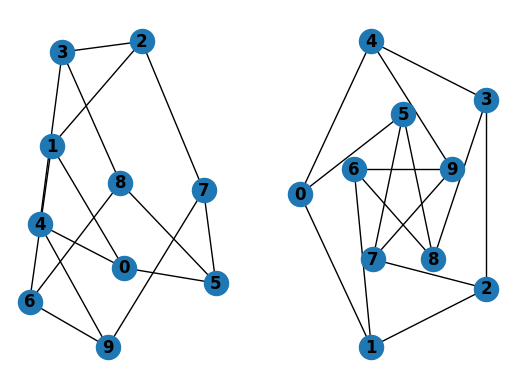

In [51]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

You can specify drawing options separately using an `options` dictionary.
You can find additional options via `draw_networkx()` and
layouts via `layout`. For example, the shell layout `draw_shell()` places different gropus of nodes in concentric circles ("shells").

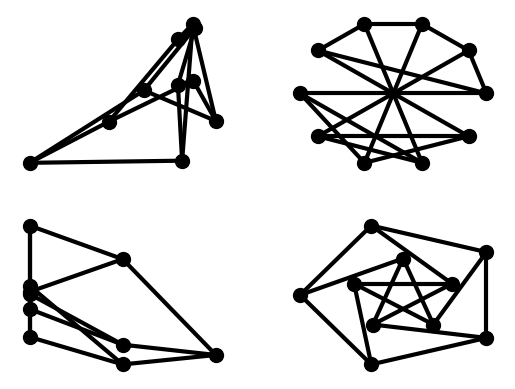

In [52]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3, # width of the edges
}
plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

See Drawing in the NetworkX Reference for additional details.

# Algorithms
NetworkX offers the implementation of a lot of network-related algorithms, which allow performing complex graph analysis in a simple way.
As an overview we present the following functions contained in the modules `networkx.algorithms.components` and `networkx.algorithms.cycles`.

## Strong connectivity
A directed graph is strongly connected if and only if every node in the graph is reachable from every other node, i.e., if from every ordered pair of nodes there exists a path from the first node to the second one.
`networkx.algorithms.components.is_strongly_connected` test directed graph for strong connectivity.

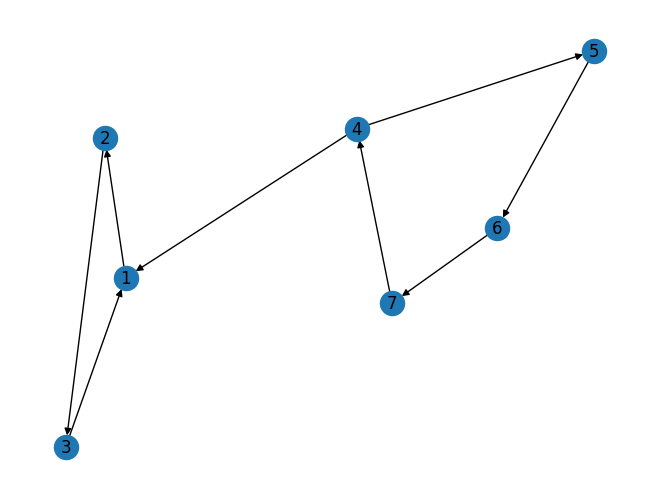

In [54]:
DG = nx.DiGraph()
DG.add_edges_from([(1,2),(2,3),(3,1),(4,5),(5,6),(6,7),(7,4),(4,1)])
nx.draw(DG,with_labels=True)

**Question**: is this graph strongly connected?

In [55]:
print("Is strongly connected:", nx.algorithms.components.is_strongly_connected(DG))

Is strongly connected: False


The analysis of the connectedness of a graph can be further refined by considering the so called `connected components` of $G$, that are the maximal subsets $V_1, V_2, ..., V_k$ of the node set $V$ such that, for every pair of nodes $i$ and $j$ in the
same component $V_h$, there exists a path from $i$ to $j$.

**Question**: how many connected components does this graph have?

In [56]:
print("Number of connected components:", nx.algorithms.components.number_strongly_connected_components(DG))

Number of connected components: 2


We can construct the condensation graph, which is the graph with each of the strongly connected components contracted into a single node. Edges in the condensation graph represents edges between nodes of different connected components.

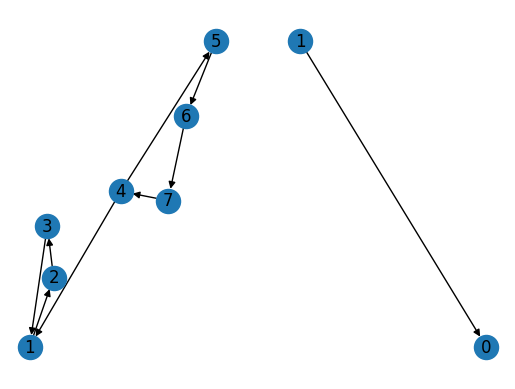

In [57]:
# CG condensation graph of DG
CG = nx.algorithms.components.condensation(DG)
plt.subplot(121)
nx.draw(DG,with_labels=True)
plt.subplot(122)
nx.draw(CG, with_labels=True)

**Question**: can a condensation graph with more than one node be strongly connected?

$CG$ is the condensation graph of $DG$. The node labels are integers corresponding to the index of the component in the 
list of strongly connected components of $DG$.

Each node in $CG$ also has a node attribute `members` with the set of original nodes in $DG$ that form 
the strongly connected component that the node in $CG$ represents.

We now map nodes from $CG$ into set of nodes of $DG$

In [58]:
dict(CG.nodes)

{0: {'members': {1, 2, 3}}, 1: {'members': {4, 5, 6, 7}}}

$CG$ has a graph attribute named `mapping` with a dictionary mapping the original nodes of $DG$ to the nodes in $CG$ to which 
they belong. 

In [59]:
mapping = CG.graph['mapping']
print(mapping)

{1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1}


**Note**: all previous functions related to strong connectivity can only be applied to directed graphs. Counterparts are provided for undirected graphs.

## Sinks
**Sink**: node that does not have out-neighbors.

In networkxX, an attracting component in a directed graph $DG$ is a strongly connected component with the property that a random walker on the graph will never leave the component, once it enters the component. This is equivalent to requiring that the strongly connected component is a trapping set.
Attracting components in $DG$ consitute sinks of its condensation graph $CG$.

`networkx.algorithms.components.number_attracting_components` returns the number of attracting components in $DG$.


In [60]:
print("Number of attracting components:", nx.algorithms.components.number_attracting_components(DG))

Number of attracting components: 1


`networkx.algorithms.components.attracting_components` generates the attracting components of $DG$.
You can directly list nodes of $DG$ belonging to each attracting component:

In [61]:
for c in nx.algorithms.components.attracting_components(DG):
    print(c)

{1, 2, 3}


or you can obtain the subgraphs of $DG$ induced on each attracting component and visualize them:

1


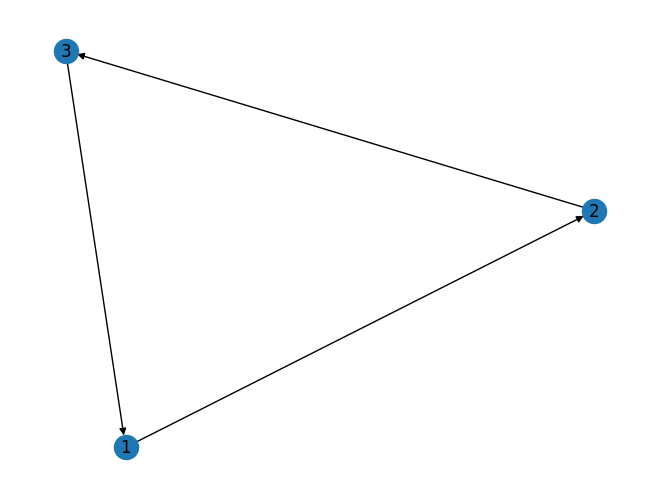

In [63]:
# components = list of subgraphs induced on each attracting component of DG
components = list(DG.subgraph(c).copy() for c in nx.algorithms.components.attracting_components(DG))

# the number of attracting components is the length of the list
print(len(components))

nx.draw(components[0],with_labels=True)

## Cycles
A simple cycle is a closed path where no node appears twice. Two elementary circuits are considered distinct if they are not cyclic permutations of each other.

NetworkX provides cycle finding algorithms, that can be exploited to compute the periodicity of nodes and graphs.
For example, `networkx.algorithms.cycles.simple_cycles` find simple cycles of a directed graph

In [64]:
cycles = list(nx.simple_cycles(DG))
for cycle in cycles:
    print("Cycle:", cycle, "Lenght:", len(cycle))

Cycle: [4, 5, 6, 7] Lenght: 4
Cycle: [1, 2, 3] Lenght: 3


### Period of a node
The period of a node is the Greatest Common Divisor of all cycles containing such node.

#### Exercise 1
Try to compute the period of each node in $DG$. 

**Hint**: exploit `networkx.algorithms.cycles.simple_cycles` and `math.gcd()`, which computes the GCD of two given numbers.
Remember that you can compute the GCD of a list of numbers sequentially:

In [65]:
from math import gcd

numbers = [3,9,24]
GCD = numbers[0] # First initialize GCD with the first number of the list
for n in numbers:
    GCD = gcd(GCD,n)
GCD

3

In [ ]:
# TO DO

#### Exercise 2
Consider the following directed graph.

In [ ]:
DG = nx.DiGraph()
n_nodes = 10
nx.add_cycle(DG, range(n_nodes))
for n in range(n_nodes):
    other = n+3
    if other>=n_nodes:
        other-=n_nodes
    DG.add_edge(other,n)
nx.draw_circular(DG, with_labels=True)


We can check that DG is strongly connected and not aperiodic

In [ ]:
print("Is strongly connected:",nx.is_strongly_connected(DG))
print("Is aperiodic:",nx.is_aperiodic(DG))

In view of these facts, compute the period of the graph DG.

**Hint:** Exploit the results from previous exercise and the fact that all nodes of a strongly connected graph have the same period.

In [ ]:
# TO DO

## Spanning subgraphs
A spanning subgraph is a subgraph that contains all the nodes of the original graph. Of particular interest are spanning trees, i.e., spanning subgraphs that are trees. Spanning trees find many applications, e.g., traveling salesman problem, and search algorithms.

We can generate all the spanning subgraphs of a given graph as follows.

Number of subgraphs: 64


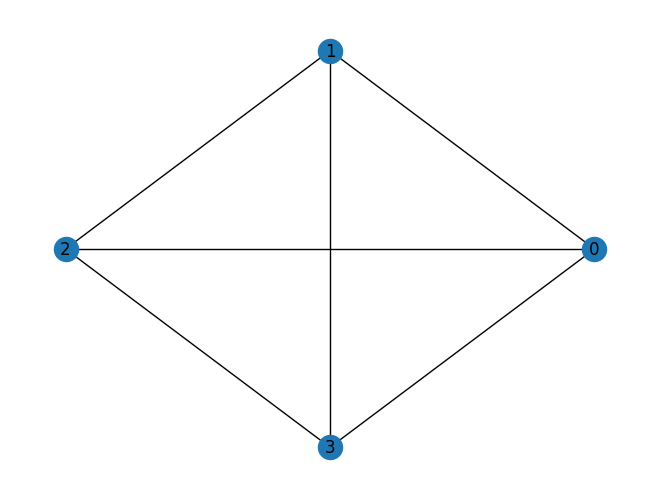

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# As an example, construct a graph
G = nx.Graph()
nx.add_cycle(G, range(4))
G.add_edges_from([(0,2), (1,3)])
nx.draw_circular(G, with_labels=True)

# Define a function for computing the power set of a given set
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

# Use 'powerset' to compute all subgraphs of G
subgraphs = list()
for edge_set in powerset(G.edges):
    H = nx.Graph()
    H.add_nodes_from(G.nodes)
    H.add_edges_from(edge_set)
    subgraphs.append(H)
print("Number of subgraphs:", len(subgraphs))

We now compute all spanning subtrees of G. To this end, exploit the following characterization:

**Theorem**: an undirected graph T is a tree if and only if it is connected and E=N-1, where E is the number of (undirected) edges and N is the number of nodes

In [6]:
trees = list()
for H in subgraphs:
    if H.number_of_edges()==H.number_of_nodes()-1 and nx.is_connected(H):
        trees.append(H)

print("Number of spanning trees:", len(trees))

Number of spanning trees: 16


Let us plot some of the spanning trees

In [ ]:
plt.subplot(141)
nx.draw_circular(trees[1], with_labels=True)

plt.subplot(142)
nx.draw_circular(trees[5], with_labels=True)

plt.subplot(143)
nx.draw_circular(trees[9], with_labels=True)

plt.subplot(144)
nx.draw_circular(trees[15], with_labels=True)

#### Solutions

In [ ]:
# EXERCISE 1

cycles = tuple(nx.simple_cycles(DG))
period = []

for n in DG.nodes:
    # find cycles of the graph that contain node n, and append to a list the length of each cycle
    len_cycles_n = []
    for cycle in cycles:
        if n in cycle:
            len_cycles_n.append(len(cycle))
    # find greatest common divisor of cycles that involve n, which is the period of node n
    GCD = len_cycles_n[0]
    for l in len_cycles_n:
        GCD = gcd(GCD,l)
    period.append((n,GCD))
        
print(period)

In [ ]:
# EXERCISE 2

cycles = tuple(nx.simple_cycles(DG))

# since the graph is strongly connected, all the nodes have same period
# we then compute period of node 1
n=1
len_cycles = []
for cycle in cycles:
    if n in cycle:
        len_cycles.append(len(cycle))
if len_cycles != []:
    GCD = len_cycles[0]
    for l in len_cycles:
        GCD = gcd(GCD,l)
    period = GCD
else:
    period = GCD
        
print(period)